<a href="https://colab.research.google.com/github/park-geun-hyeong/Computer_Vision/blob/main/CH4/YoloV3_Keras_ObjectDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Git Clone

In [ ]:
! git clone http://github.com/chulminkw/DLCV

In [ ]:
! pip install tensorflow==1.15.2
! pip install keras==2.3.0

In [6]:
!rm -rf __init__.py
!rm -rf __pycache__

In [ ]:
!wget https://raw.githubusercontent.com/chulminkw/DLCV/master/colab_tf115_modify_files/__init__.py

## Import Library

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
import cv2
import time
import warnings
warnings.filterwarnings('ignore')

In [8]:
import keras
import tensorflow as tf

print(keras.__version__)
print(tf.__version__)

Using TensorFlow backend.


2.3.0
1.15.2


## Download keras-yolo3

In [9]:
os.mkdir('/content/DLCV/keras_yolo')
os.chdir('/content/DLCV/keras_yolo')
os.getcwd()

'/content/DLCV/keras_yolo'

In [ ]:
! git clone https://github.com/qqwweee/keras-yolo3.git

In [13]:
os.listdir('/content/DLCV/keras_yolo/keras-yolo3')

['README.md',
 'train.py',
 'voc_annotation.py',
 'yolov3.cfg',
 '.gitignore',
 'train_bottleneck.py',
 'yolov3-tiny.cfg',
 'convert.py',
 '.git',
 'model_data',
 'coco_annotation.py',
 'LICENSE',
 'kmeans.py',
 'yolo_video.py',
 'font',
 'yolo.py',
 'yolo3',
 'darknet53.cfg']

In [15]:
%cd '/content/DLCV/keras_yolo/keras-yolo3'
os.getcwd()

/content/DLCV/keras_yolo/keras-yolo3


'/content/DLCV/keras_yolo/keras-yolo3'

In [ ]:
!wget https://github.com/chulminkw/DLCV/releases/download/1.0/yolov3.weights

In [ ]:
!python convert.py yolov3.cfg yolov3.weights model_data/yolo.h5 ##yolo3 weight를 keras-yolo에서 사용하기 위해 h5 file로 변경

In [19]:
os.listdir('/content/DLCV/keras_yolo/keras-yolo3/model_data')

['coco_classes.txt',
 'tiny_yolo_anchors.txt',
 'voc_classes.txt',
 'yolo.h5',
 'yolo_anchors.txt']

In [21]:
import sys
from PIL import Image
import argparse
from yolo import YOLO, detect_video


In [23]:
path = '/content/DLCV/keras_yolo/keras-yolo3/model_data/'

config_dict={}
yolo = YOLO(model_path = path+'yolo.h5',
            anchors_path = path+'yolo_anchors.txt',
            classes_path = path+'coco_classes.txt') 

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
/content/DLCV/keras_yolo/keras-yolo3/model_data/yolo.h5 model, anchors, and classes loaded.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## Image Detection

In [ ]:
img_path = '/content/DLCV/data/image/beatles01.jpg'  #keras-yolo3는 PIL을 사용하여 image처리

img = Image.open(img_path)

plt.figure(figsize=(12,12))
plt.imshow(img)
plt.show()

In [28]:
yolo = YOLO(model_path = path+'yolo.h5',
            anchors_path = path+'yolo_anchors.txt',
            classes_path = path+'coco_classes.txt',
            score=0.55)  ## 기존 0.3으로설정된 score 늘려서 다시 loading 

/content/DLCV/keras_yolo/keras-yolo3/model_data/yolo.h5 model, anchors, and classes loaded.


(416, 416, 3)
Found 11 boxes for img
car 0.56 (314, 233) (351, 267)
car 0.70 (502, 230) (572, 291)
car 0.79 (471, 235) (503, 261)
car 0.93 (383, 222) (400, 238)
car 0.94 (432, 225) (452, 242)
car 0.96 (138, 246) (256, 334)
person 0.71 (606, 228) (627, 293)
person 0.98 (395, 274) (551, 554)
person 0.98 (588, 272) (735, 557)
person 1.00 (48, 254) (189, 556)
person 1.00 (260, 263) (377, 537)
1.4306173659997512


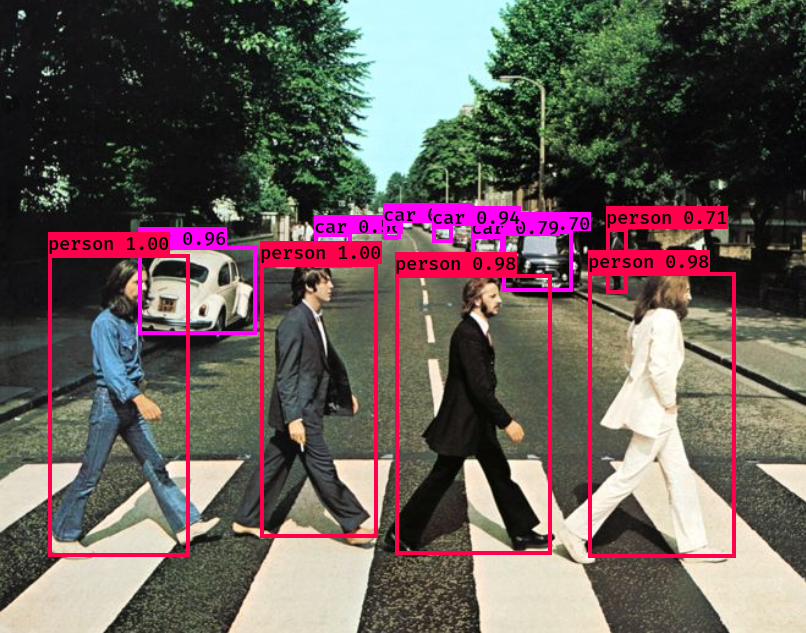

In [31]:
img = Image.open(img_path)

yolo.detect_image(img)

## Video Detection

In [35]:
import time

def get_video_detection(model,input_path, output_path):
    cap = cv2.VideoCapture(input_path)
    codec = cv2.VideoWriter_fourcc(*'XVID')

    vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    vid_fps = cap.get(cv2.CAP_PROP_FPS)

    vid_out = cv2.VideoWriter(output_path, codec, vid_fps, vid_size)
    idx=0
    while True:
        has_img, img_frame = cap.read()
        if not has_img:
            print("no more frame")
            break

        start=time.time()
        image = Image.fromarray(img_frame) #array 형태로 읽인 img_frame을 PIL의 image 형태로변환 
        detected_img = model.detect_image(image) # yolo.detect_image를 사용해 PIL image detection 진행
        result = np.asarray(detected_img) # 다시 array 형태로 변환한다(vid_out에 frame저장하기 위해서)

        idx+=1
        print("{}번째 frame 처리 시간: {:.4f}".format(idx, time.time()-start)

        vid_out.write(result)

    vid_out.release()
    cap.release()
    print("Total time to process video: {:.4f}".format(time.time()-start))

In [ ]:
vid_input = '/content/DLCV/data/video/Night_Day_Chase.mp4'
vid_output = '/content/output.avi'

get_video_detection(yolo, vid_input, vid_output)